In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor # 딥러닝 neural_network
from sklearn.metrics import r2_score# 선형 모델(Linear Models)

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')


In [4]:
boston = load_boston()

boston_df = pd.DataFrame(  boston['data'],columns=boston['feature_names'])
boston_df['MEDV'] =boston.target
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# 특성데이터와 라벨데이터 나누기
x_data = boston_df.iloc[:,:-1]
y_data = boston_df.iloc[:,-1]

In [8]:
print(x_data.shape, y_data.shape)

(506, 13) (506,)


In [10]:
# 데이터 나누기
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=1)

### make_pipeline

In [11]:
# pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
# pipeline 연속적인 작업을 하게끔 도와줌
# Scaler을 한후 SGDR에 적용하게 함

model = make_pipeline(StandardScaler(), SGDRegressor())
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [13]:
# R2 스코어 확인
print('훈련데이터 R2 : ',model.score(x_train, y_train))
print('테스트데이터 R2 : ',model.score(x_test, y_test))

훈련데이터 R2 :  0.7279161611873439
테스트데이터 R2 :  0.7616540777545536


In [15]:
# 예측값
model.predict([x_test.iloc[0]])

array([31.87513654])

### 교차검증 (데이터가 작은 경우)
- 학습데이터와 테스트 데이터를 나누기에 데이터 수가 적음
- 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만 데이터수가 적어 잘못된 검증이 될수 있음
- cross_val_score() 함수는 교차검증을 수행하여 모델을 검증

In [10]:
from sklearn.model_selection import cross_val_score

In [31]:
# (모델 객체, 원본데이터,cv:교차검증횟수, verbose:진행상황확인)
# 교차검증결과가 너무 낮게 나오면 다중공선성을 확인

r2Score = cross_val_score(model, x_data, y_data, cv=7, scoring='r2',verbose=1)
print(r2Score)
print('='*20)
print(r2Score.mean())

[ 0.65743937  0.57996455  0.6698557   0.62670236  0.54487698 -0.28803787
  0.41590622]
0.4581010448881401
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


## 다중공선성

In [32]:
import seaborn as sb

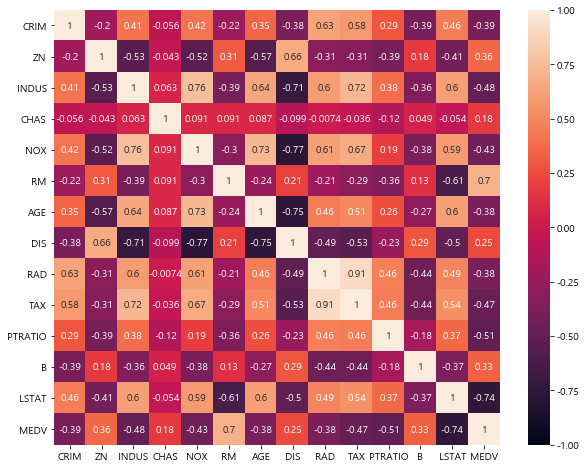

In [39]:
plt.figure(figsize=(10,8))
# annot=True 값표시
sb.heatmap(boston_df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# 빈 데이터 프레임을 만듬
# VIF의 값이 높은 변수들은 제거하고 다시 학습

vif = pd.DataFrame()

vif["VIF Factor"] =  [variance_inflation_factor(x_data.values, i) 
                        for i in range(x_data.shape[1])]
vif['features'] = x_data.columns
vif

,VIF Factor,features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


## 연습문제 
- 캘리포니아 주택가격을 이용하여  crossvalidation, 다중공선성을 확인한후에
다중공선성이 높은 컬럼을 제외하고 학습하여 crossvalidation값을 확인하시요

In [50]:
from sklearn.datasets import fetch_california_housing

In [51]:
cal = fetch_california_housing()

In [52]:
cal_df = pd.DataFrame(cal['data'],columns=cal['feature_names'])
cal_df['target'] = cal['target']
cal_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
x_data = cal_df.iloc[:,:-1]
y_data = cal_df.iloc[:,-1]

print(x_data.shape, y_data.shape)

(20640, 8) (20640,)


In [54]:
# 정규화 
model = make_pipeline( StandardScaler(), LinearRegression() )
model.fit(x_data, y_data)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [55]:
r2Score = cross_val_score( model, x_data, y_data, 
                        cv=10, scoring='r2',verbose=0 )
print( r2Score )
print( r2Score.mean() )

[0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
0.5110068610524554


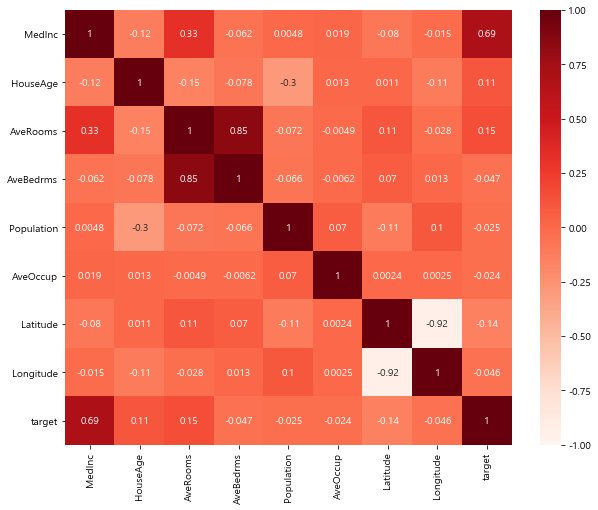

In [56]:
import seaborn as sb
plt.figure( figsize=(10,8) )
sb.heatmap( cal_df.corr(), annot=True, cmap='Reds', vmin=-1,vmax=1)
plt.show()

In [57]:
# vif 값이 높은 Latitude, Longitude 제거해야함

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data.values, i )  for i in range( x_data.shape[1] ) ]
vif['features'] = x_data.columns
vif

,VIF Factor,features
0,11.511140,MedInc
1,7.195917,HouseAge
2,45.993601,AveRooms
3,43.590314,AveBedrms
4,2.935745,Population
5,1.095243,AveOccup
6,559.874071,Latitude
7,633.711654,Longitude


In [58]:
# vif 값이 높은 Latitude, Longitude 제거
x_data_ = x_data.drop(['Latitude', 'Longitude'], axis=1)

In [59]:
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data_.values, i )  for i in range( x_data_.shape[1] ) ]
vif['features'] = x_data_.columns
vif

,VIF Factor,features
0,7.766787,MedInc
1,4.309941,HouseAge
2,41.111592,AveRooms
3,34.118257,AveBedrms
4,2.322315,Population
5,1.094793,AveOccup


In [60]:
cal_df1 = cal_df.drop(['Latitude', 'Longitude'], axis=1)

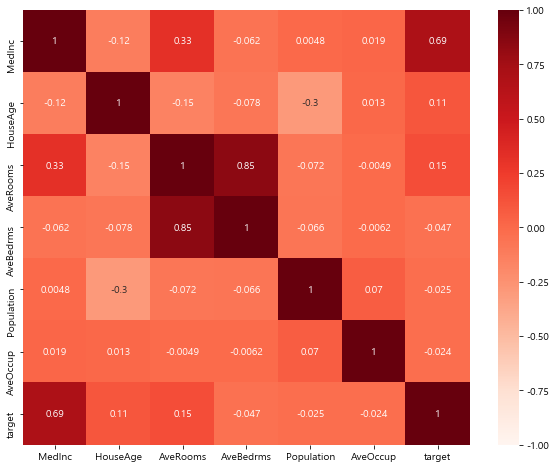

In [61]:
plt.figure( figsize=(10,8) )
sb.heatmap( cal_df1.corr(), annot=True, cmap='Reds', vmin=-1,vmax=1)
plt.show()

In [62]:
x_data1 = cal_df1.iloc[:,:-1]
y_data1 = cal_df1.iloc[:,-1]
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_data1, y_data1)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [63]:
# 6. 교차 검증
r2Score = cross_val_score(model, x_data1, y_data1)
print(r2Score)
print(r2Score.mean())

[0.53526398 0.52359407 0.50679851]
0.5218855207429663
